In [1194]:
import numpy as np
import pandas as pd
#import polars as pl
from keras.models import Sequential
from keras.layers import LSTM,GRU, Dense

# サンプルの時系列データを生成
def generate_data(n_points):
    X = np.linspace(0, 10, n_points)
    y = np.sin(X)
    return y

# データの前処理
def prepare_data( y, time_steps):
    X_processed, y_processed = [], []
    for i in range(len(y) - time_steps):
        X_processed.append(y[i:i + time_steps])
        y_processed.append(y[i + time_steps])
    return np.array(X_processed), np.array(y_processed)

# LSTMモデルの定義
def create_lstm_model(time_steps, features):
    model = Sequential()
    #model.add(LSTM(100, input_shape=(time_steps, features)))
    model.add(GRU(100, input_shape=(time_steps, features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# 再帰的な予測を行う
def recursive_predict(model, X_seed, time_steps, n_steps):
    X_pred = X_seed.copy()
    for _ in range(n_steps):
        pred = model.predict(X_pred[-time_steps:].reshape(1, time_steps, 1))[0, 0]
        X_pred = np.append(X_pred, pred)
    return X_pred

In [1195]:
# サンプルデータの作成と前処理
n_points = 70            #学習で使う直近Nタイムステップ（Nカ月） 
#y = generate_data(n_points)
df = pd.read_excel('a.xlsx',sheet_name='Sheet1')
df = df[-n_points:].reset_index(drop=True)

data_min = df['data'].min()
data_max = df['data'].max()
print(data_min, data_max)

df["y"] = (df["data"] - data_min) / (data_max - data_min)   
y = df['y'].values
print(y)


15 432
[0.         0.         0.         0.02398082 0.10071942 0.10071942
 0.12470024 0.12470024 0.12470024 0.14868106 0.14868106 0.1558753
 0.16306954 0.16306954 0.18705036 0.18705036 0.18705036 0.18705036
 0.18705036 0.23501199 0.23501199 0.23501199 0.28297362 0.28297362
 0.29016787 0.29016787 0.3381295  0.34532374 0.34532374 0.34532374
 0.39328537 0.39328537 0.40047962 0.40047962 0.40527578 0.40527578
 0.41007194 0.41007194 0.41486811 0.41966427 0.41966427 0.49160671
 0.49640288 0.50119904 0.50119904 0.57314149 0.57314149 0.57314149
 0.58033573 0.58513189 0.59232614 0.59952038 0.59952038 0.67146283
 0.67865707 0.67865707 0.77458034 0.77458034 0.78177458 0.87769784
 0.882494   0.88968825 0.89688249 0.90407674 0.95203837 1.
 1.         1.         1.         1.        ]


In [1196]:
#print(X)

In [1197]:
print(y)

[0.         0.         0.         0.02398082 0.10071942 0.10071942
 0.12470024 0.12470024 0.12470024 0.14868106 0.14868106 0.1558753
 0.16306954 0.16306954 0.18705036 0.18705036 0.18705036 0.18705036
 0.18705036 0.23501199 0.23501199 0.23501199 0.28297362 0.28297362
 0.29016787 0.29016787 0.3381295  0.34532374 0.34532374 0.34532374
 0.39328537 0.39328537 0.40047962 0.40047962 0.40527578 0.40527578
 0.41007194 0.41007194 0.41486811 0.41966427 0.41966427 0.49160671
 0.49640288 0.50119904 0.50119904 0.57314149 0.57314149 0.57314149
 0.58033573 0.58513189 0.59232614 0.59952038 0.59952038 0.67146283
 0.67865707 0.67865707 0.77458034 0.77458034 0.78177458 0.87769784
 0.882494   0.88968825 0.89688249 0.90407674 0.95203837 1.
 1.         1.         1.         1.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


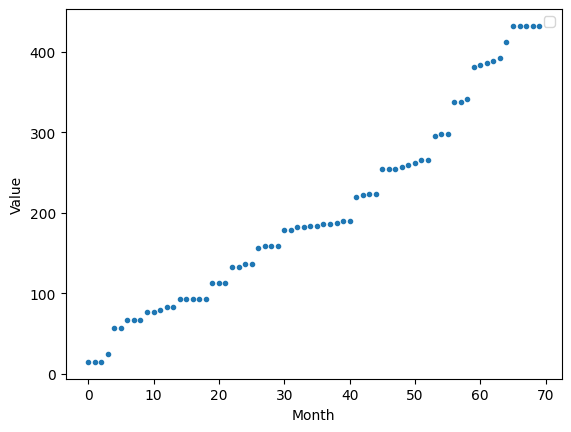

In [1198]:
import matplotlib.pyplot as plt

#plt.plot(np.arange(n_points), y, label='True Data')
#plt.plot(np.arange(n_points, n_points + n_steps), predicted_sequence[-n_steps:], label='Predicted Data')
plt.plot(np.arange(len(df)),df['data'].values,'.')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

In [1199]:
time_steps = 24       #学習／予測する単位のタイムステップ数（Nカ月）
X_processed, y_processed = prepare_data( y, time_steps)

In [1200]:
# print(X_processed.shape)
# print(X_processed)

In [1201]:
# print(y_processed.shape)
# print(y_processed)

In [1202]:
print(X_processed[-1])   # タイムステップ１のXの最後は、タイムステップ０の予測値yが入る。 
print(len(X_processed[-1]))

[0.57314149 0.57314149 0.57314149 0.58033573 0.58513189 0.59232614
 0.59952038 0.59952038 0.67146283 0.67865707 0.67865707 0.77458034
 0.77458034 0.78177458 0.87769784 0.882494   0.88968825 0.89688249
 0.90407674 0.95203837 1.         1.         1.         1.        ]
24


In [1203]:
print(y_processed[-1])    # 

1.0


In [1204]:
# データをLSTMモデルに適合
model = create_lstm_model(time_steps, 1)
history = model.fit(X_processed, y_processed, epochs=40, batch_size=16, verbose=1)


Epoch 1/40


c:\pyenv\py311tmp\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4308
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2431 
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0991 
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170 
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0380 
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 
Epoch 13/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 
Epoch 14/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Epoch 15/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 16/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

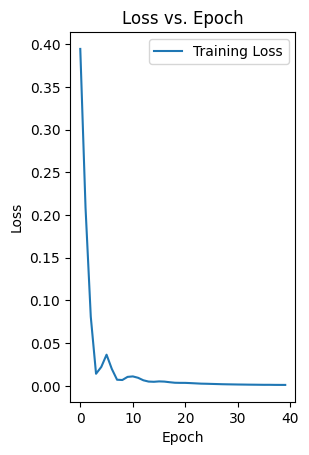

In [1205]:
# 損失のプロット
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()


In [1206]:
print(y[-time_steps:])
print(len(y[-time_steps:]))

[0.57314149 0.57314149 0.58033573 0.58513189 0.59232614 0.59952038
 0.59952038 0.67146283 0.67865707 0.67865707 0.77458034 0.77458034
 0.78177458 0.87769784 0.882494   0.88968825 0.89688249 0.90407674
 0.95203837 1.         1.         1.         1.         1.        ]
24


In [1207]:
# 既知データの最後のtime_step分から予測を開始
X_seed = y[-time_steps:]

# 再帰的な予測の実行
n_steps = 120    # Nタイムステップ先（Nカ月先）までの予測
predicted_seq = recursive_predict(model, X_seed, time_steps, n_steps)   # time_steps + n_steps の長さになっている。  

#result_df = pd.DataFrame(data=pd.concat([pd.Series(y), pd.Series(predicted_seq)], axis=1))

#min-maxスケーラを元に戻す
keisu=1.0 #予測値を適用する係数


print( y[-1] , predicted_seq[time_steps - 1] ,  predicted_seq[time_steps]  , predicted_seq[time_steps + 1]  , predicted_seq[time_steps + 2] )

y_ori = y * (data_max - data_min) + data_min 
predicted_seq_ori = predicted_seq * (data_max - data_min) * keisu   
predicted_seq_ori += y_ori[-1] - predicted_seq_ori[time_steps ]  # 既存の値の最終（ y_ori[-1] ） と  predicted_seq_ori[time_steps - 1]  が同じ点 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━

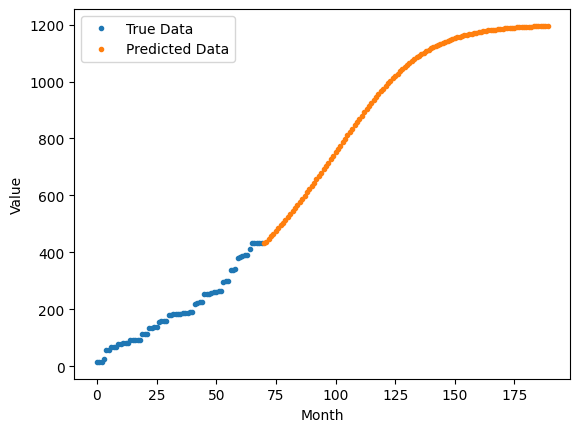

In [1208]:
# 予測結果の表示
import matplotlib.pyplot as plt

plt.plot(np.arange(n_points)                    , y_ori                       ,'.', label='True Data')
plt.plot(np.arange(n_points, n_points + n_steps), predicted_seq_ori[-n_steps:],'.', label='Predicted Data')
#plt.plot(np.arange(n_points, n_points + n_steps), predicted_seq_ori,'.', label='Predicted Data')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()
